In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # For Label Encoding importing library

from sklearn.ensemble import RandomForestClassifier  # importing library for Random Forest

from sklearn.model_selection import train_test_split # for training and testing

from sklearn.metrics import classification_report, confusion_matrix  #Model Evaluation

### Importing dataset From Kaggle

In [45]:
# Loading dataset file. Dataset is being selected from Kaggle.
# Name of the dataset on Kaggle: Lung Cancer Risk in 25 Countries
cancer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Hassan Assignment/lung_cancer_prediction_dataset.csv')

#Loading first few rows of dataset
cancer_df.head(10)

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0
5,5,India,1380,54,Female,No,0,0,No,No,...,High,No,No,Poor,No,NaN,Developing,70000,1.95,0.0
6,6,Mexico,128,60,Female,No,0,0,No,Yes,...,Medium,No,No,Poor,No,NaN,Developing,28000,2.34,0.0
7,7,Iran,84,74,Female,No,0,0,Yes,No,...,Low,No,No,Poor,Yes,NaN,Developing,27000,1.12,0.0
8,8,Myanmar,54,32,Male,Yes,37,29,No,No,...,Low,No,Yes,Poor,No,NaN,Developing,21197,0.60,0.0
9,9,Ethiopia,120,29,Female,No,0,0,No,Yes,...,Medium,No,No,Poor,No,NaN,Developing,18000,0.71,0.0


### Preprocessing on dataset

In [46]:
# To check Dimensions of dataset -- (number of rows, number of columns)
cancer_df.shape

(220632, 24)

In [47]:
cancer_df.columns

Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

In [48]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [49]:
cancer_df.isnull().sum()

,0
ID,0
Country,0
Population_Size,0
Age,0
Gender,0
Smoker,0
Years_of_Smoking,0
Cigarettes_per_Day,0
Passive_Smoker,0
Family_History,0


Dataset has missing values in column **Cancer_Stage** and **Treatment_Type**

### **Statistical Analysis**

In order to understand the nature of numerical values of dataset. To detect the outliers in data usually by checking the minimum and maximum values in the dataset will perform statistical analysis.

In [50]:
# Statistical Analysis

cancer_df.describe()

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


**Statistical analysis:**

- Mortality_Rate column **Mean:** 3.05 and **Max:** 90 shows a huge gap.


- Survival_Years column shows **25%, 50%, and 75%** values are zero which means mostly people didn't survive.



After Statistical analysis on numerical columns now need to analyze categorical columns and following are the Categorical columns in the dataset.
-  Country
- Gender
- Smoker
- Passive_Smoker
- Family_History
- Lung_Cancer_Diagnosis
- Adenocarcinoma_Type
- Air_Pollution_Exposure
- Occupational_Exposure
- Indoor_Pollution
- Healthcare_Access
- Early_Detection
- Developed_or_Developing


### **Encoding of Categorical data**

Machine Learning models only understand numerical values and for that reason we  need to encode all categorical values to numerical using Label Encoding and One hot Encoding.

**Label Encoding** apply on binary features and **One-Hot Encoding** apply on those features which have more than two categories.


In [51]:
labelencoder = LabelEncoder()

In [52]:
cancer_df['Smoker'] = labelencoder.fit_transform(cancer_df['Smoker'])
cancer_df['Passive_Smoker'] = labelencoder.fit_transform(cancer_df['Passive_Smoker'])
cancer_df['Lung_Cancer_Diagnosis'] = labelencoder.fit_transform(cancer_df['Lung_Cancer_Diagnosis'])

In [53]:
# For One-hot Encoding
cat_columns = [
    'Gender',
    'Country',
    'Family_History',
    'Adenocarcinoma_Type',
    'Air_Pollution_Exposure',
    'Occupational_Exposure',
    'Indoor_Pollution',
    'Healthcare_Access',
    'Early_Detection',
    'Developed_or_Developing',
    'Cancer_Stage',
    'Treatment_Type'
]



encoded_new_df = pd.get_dummies(cancer_df, columns=cat_columns, drop_first=True)
encoded_new_df.head()


,ID,Population_Size,Age,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Lung_Cancer_Diagnosis,Survival_Years,Annual_Lung_Cancer_Deaths,...,Occupational_Exposure_Yes,Indoor_Pollution_Yes,Healthcare_Access_Poor,Early_Detection_Yes,Developed_or_Developing_Developing,Cancer_Stage_Stage 2,Cancer_Stage_Stage 3,Cancer_Stage_Stage 4,Treatment_Type_Radiotherapy,Treatment_Type_Surgery
0,0,1400,80,1,30,29,0,0,0,690000,...,True,False,True,False,True,False,False,False,False,False
1,1,84,53,0,0,0,1,0,0,27000,...,True,False,True,False,True,False,False,False,False,False
2,2,128,47,1,12,6,1,0,0,28000,...,False,False,True,True,True,False,False,False,False,False
3,3,273,39,0,0,0,0,0,0,40000,...,False,False,True,False,True,False,False,False,False,False
4,4,59,44,0,0,0,1,0,0,15000,...,True,False,True,False,True,False,False,False,False,False


## **Visualization of Lung Cancer Dataset to Understand the data.**

**Lung Cancer Diagnosis by different demographic groups**

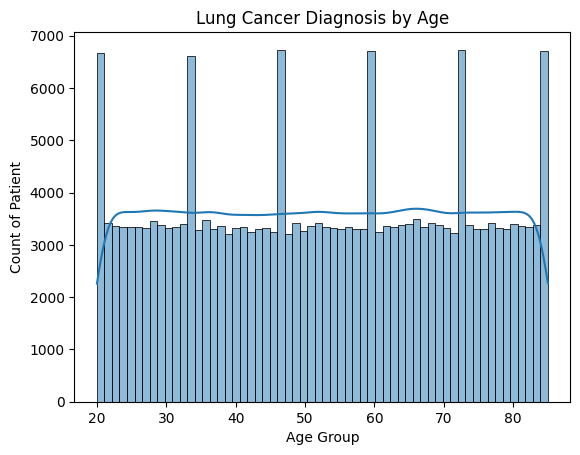

In [54]:
# Lung Cancer Diagnosis by Age
sns.histplot(cancer_df['Age'], kde=True)
plt.title('Lung Cancer Diagnosis by Age')
plt.xlabel('Age Group')
plt.ylabel('Count of Patient')
plt.show()

Distribution of Age on Lung Cancer dataset shows that it's uniform and it has spikes at certain ages around 25, 35, 45, 60, 75, and 80.

### **Lung Cancer Diagnosis based on Gender**

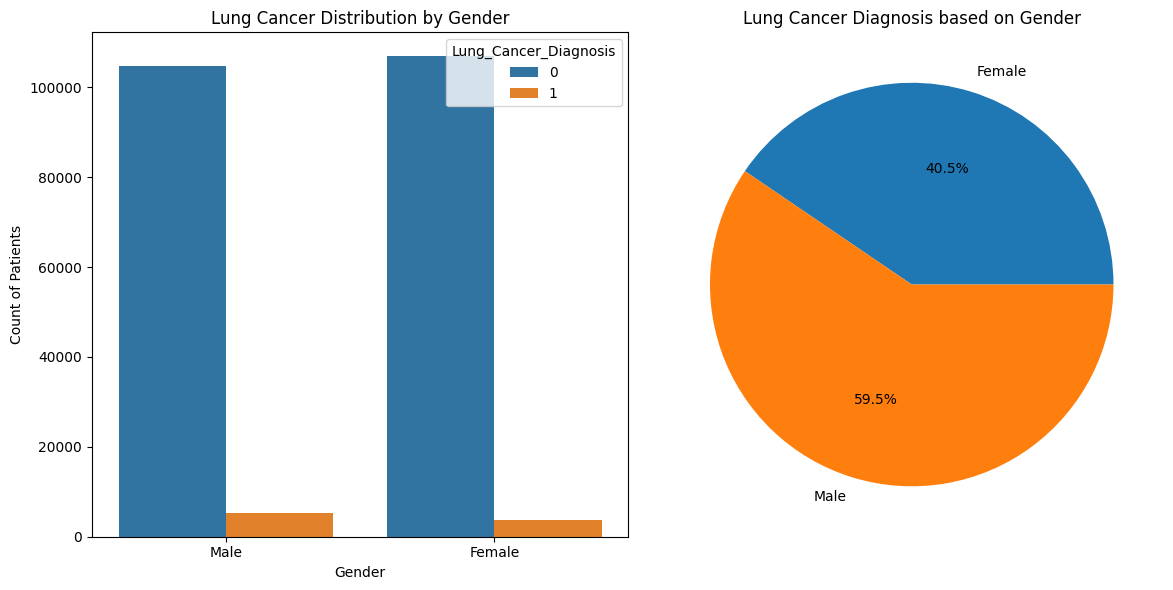

In [55]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

#Count plot
sns.countplot(x='Gender', hue='Lung_Cancer_Diagnosis', data=cancer_df, ax=axs[0])
axs[0].set_title('Lung Cancer Distribution by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count of Patients')


# Pie Chart
gender_effected = cancer_df.groupby('Gender')['Lung_Cancer_Diagnosis'].sum()
axs[1].pie(gender_effected, labels=gender_effected.index, autopct='%1.1f%%')
axs[1].set_title('Lung Cancer Diagnosis based on Gender')

plt.tight_layout()
plt.show()

Plots show that Male have higher no. of lung cancer diagnosis than females.

### **Effect of Years of Smoking on Diagnosis**




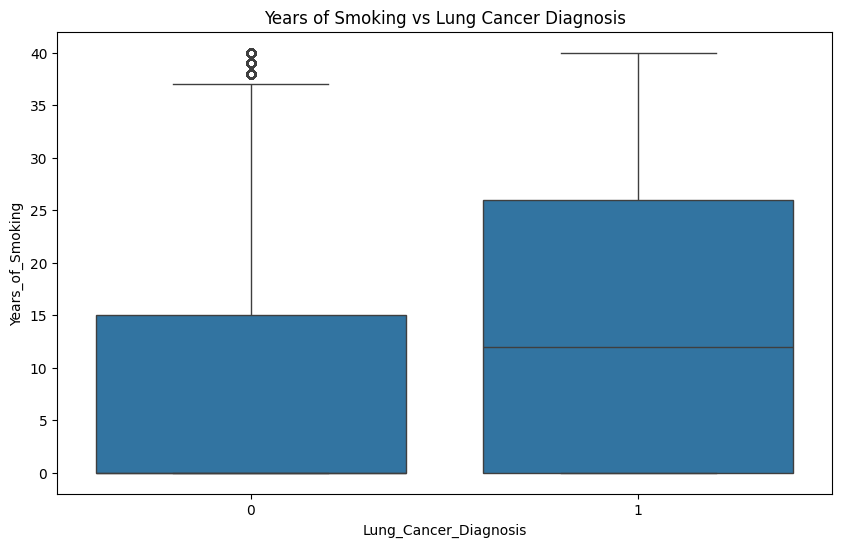

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Lung_Cancer_Diagnosis', y='Years_of_Smoking', data=cancer_df)
plt.title('Years of Smoking vs Lung Cancer Diagnosis')
plt.show()

In this distribution it's observed that patients who smoked for more years are diagnosed (1) with lung cancer and those patients who smoked for less years are not diagnosed (0)

### **Occupational Factors vs Lung Cancer Diagnosis**

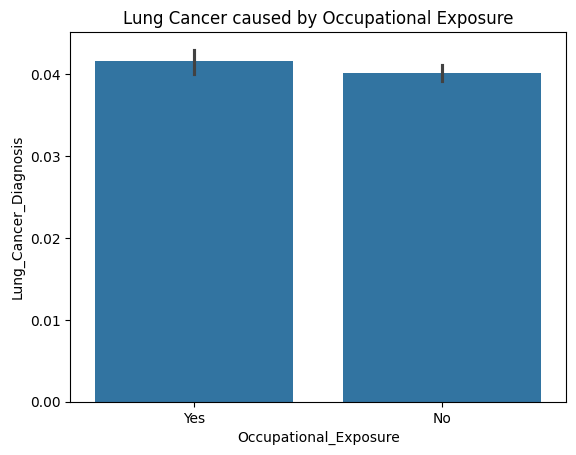

In [57]:
sns.barplot(x='Occupational_Exposure', y='Lung_Cancer_Diagnosis' ,data= cancer_df)
plt.title('Lung Cancer caused by Occupational Exposure')
plt.show()

In this box plot it shows that risk of Lung cancer slightly increases for those patients who have occupational exposure.

Occupational Exposure refers to harmful substances, environment, or working conditions like: Chemicals, Airborne particles, radiation, toxic gases.

X-axis:
- Yes = Exposed
- No = Not Exposed


### **Early detection impact on Lung Cancer Diagnosis**

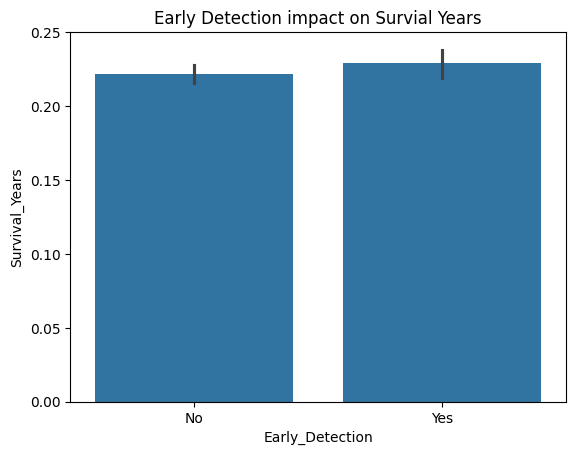

In [58]:
sns.barplot(x='Early_Detection', y='Survival_Years' ,data= cancer_df)
plt.title('Early Detection impact on Survial Years')
plt.show()

In this box plot it shows that chances of survival are slightly high if detection of cancer is done early.

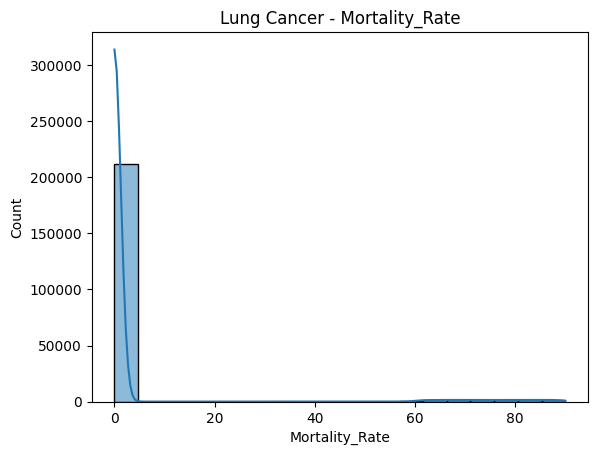

In [59]:
sns.histplot(cancer_df['Mortality_Rate'], kde=True)
plt.title('Lung Cancer - Mortality_Rate')
plt.show()

Distribution is skewed to the right and it shows that low mortality in most of the region in the left side of the plot with long peak near 0 and very small fraction of the patients have high mortality.

### **Lung Cancer Caused by Smoking**

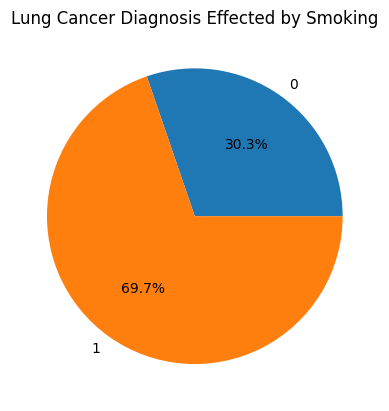

In [60]:
# Counting Lung Cancer Diagnosis based on the Smoking History
smoking_effect = cancer_df.groupby('Smoker')['Lung_Cancer_Diagnosis'].sum()
plt.pie(smoking_effect, labels=smoking_effect.index, autopct='%1.1f%%')
plt.title('Lung Cancer Diagnosis Effected by Smoking')
plt.show()

It clearly shows that smoking has a major effect on Lung Cancer and in 69.7% cases patients had a history of smoking.

### **Air Pollution efect on Lung Cancer**

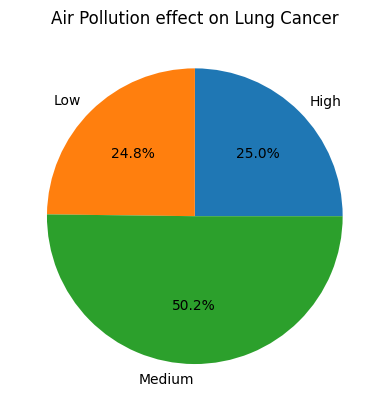

In [61]:
pollution_effect = cancer_df.groupby('Air_Pollution_Exposure')['Lung_Cancer_Diagnosis'].sum()
plt.pie(pollution_effect, labels=pollution_effect.index, autopct='%1.1f%%')
plt.title('Air Pollution effect on Lung Cancer')
plt.show()

Air Pollution have three categories for Exposure: Low, Medium, High

- Low Exposure affected cancer 24.8%
- Medium Exposure affected cancer 50.2%
- High Exposure affected cancer 25%

### **Country wise distribution of Lung Cancer Diagnosis**

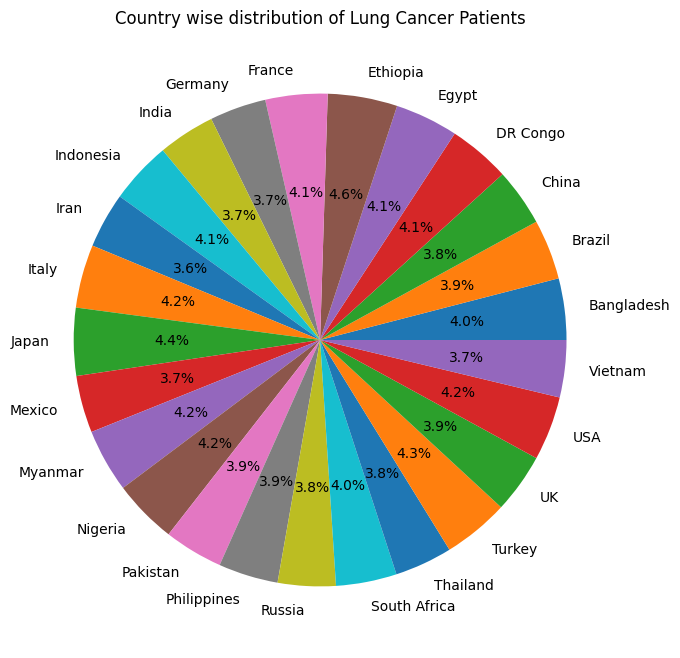

In [62]:
plt.figure(figsize=(8,8))
countries = cancer_df.groupby('Country')['Lung_Cancer_Diagnosis'].sum()
plt.pie(countries, labels=countries.index, autopct='%1.1f%%')
plt.title('Country wise distribution of Lung Cancer Patients')
plt.show()

The Charts clearly indicate that each country has a relatively uniform distribution and Iran has lowest 3.6% and Ethiopia has the highest 4.6% lung cancer patients.

## **Spliting and Validation of data**

Column **Lung_Cancer_Diagnosis** shows either patient has Lung Cancer or not, that's why it is selected for Label.

In [63]:
# All columns of dataset except column Lung_Cancer_Diagnosis.
X = encoded_new_df.drop(columns=['Lung_Cancer_Diagnosis'], axis=1)

# Label of the dataset.
y = encoded_new_df['Lung_Cancer_Diagnosis']

In [64]:
# Spliting the dataset in training and testing set  80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [65]:
#checking the distribution of features after spliting.
print(X.shape, X_test.shape, X_train.shape)

(220632, 50) (44127, 50) (176505, 50)


In [66]:
# Checking dataset proportion based on selected label.
encoded_new_df['Lung_Cancer_Diagnosis'].value_counts()

,count
Lung_Cancer_Diagnosis,
0,211671
1,8961


It shows that the dataset is highly imbalanced and more than 90% of Diagnosis are No Lung Cancer which will affect the model efficiency.

For that reason we need to balance the dataset before giving it to the model.


In [67]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [68]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [69]:
#On training data
train_predict = model.predict(X_train)

#on testing dataset
test_predict = model.predict(X_test)

In [70]:
# Confusion Matrix Evaluation on Testing data.
test_conf = confusion_matrix(y_test, test_predict)
print(test_conf)

[[42335     0]
 [    0  1792]]


Confusion Matrix Results:

**True Negatives (TN) = 42325** --> Model correctly predicted that 42325 people don't have lung cancer.

**False Positives (FP) = 0** --> Model not predict lung cancer, when the person didn't have it.

**False Negatives (FN) = 0** --> Model not missed actual lung cancer.

**True Positives (TP) = 1792** --> Model correctly predicted 1792 people had lung cancer.


In [71]:
# Classification Report
report = classification_report(y_test,test_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42335
           1       1.00      1.00      1.00      1792

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



Classification Report shows that model performed well for all metrics and made
no mistake.